In [137]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv("insurance.csv")

In [138]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [139]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [140]:
data.sex.drop_duplicates()

0    female
1      male
Name: sex, dtype: object

In [141]:
from sklearn.preprocessing import LabelEncoder
#sex
le=LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex=le.transform(data.sex)

In [142]:
#smoker or not
le.fit(data.smoker)
data.smoker=le.transform(data.smoker)


In [143]:
#region
data.region=le.fit_transform(data.region)

In [144]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [145]:
data.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

<AxesSubplot:>

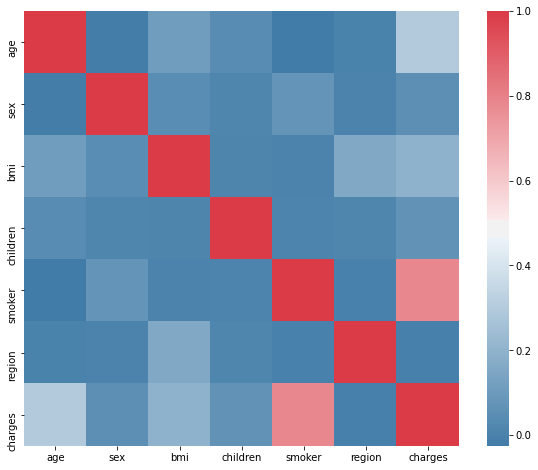

In [146]:
f,ax=plt.subplots(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(240,10,as_cmap=True),square=True,ax=ax)

In [147]:
pip install bokeh

In [148]:
from bokeh.io import output_notebook,show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure,show,output_file
p=figure(title="Distribution of charges",tools='save',
        background_fill_color="#E8DDCB")
hist,edges=np.histogram(data.charges)
p.quad(top=hist,bottom=0,left=edges[:-1],right=edges[1:],
      fill_color='#036564',line_color="#033649")
p.xaxis.axis_label='x'
p.yaxis.axis_label='Pr(x)'
show(gridplot(p,ncols=2,plot_width=400,plot_height=400,toolbar_location=None))

Loading BokehJS ...

TypeError: 'Figure' object is not iterable

Text(0.5, 1.0, 'Distribution of charges for non_smokers')

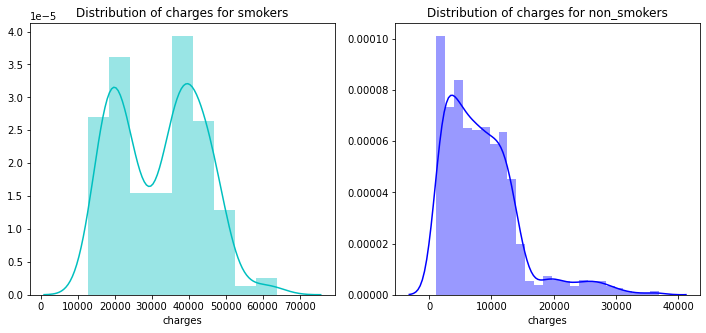

In [149]:
f=plt.figure(figsize=(12,5))
ax=f.add_subplot(121)
sns.distplot(data[(data.smoker==1)]['charges'],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker==0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non_smokers')

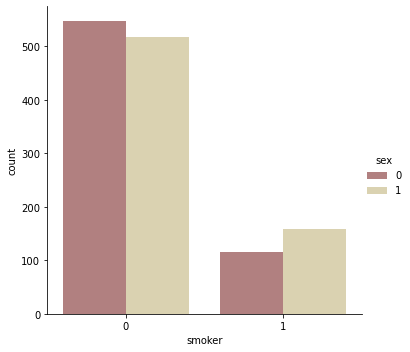

In [150]:
sns.catplot(x='smoker',kind='count',hue='sex',palette='pink',data=data)

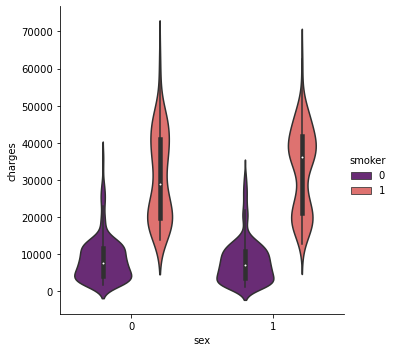

In [151]:
sns.catplot(x='sex',y='charges',hue='smoker',kind='violin'
           ,data=data,palette='magma')

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

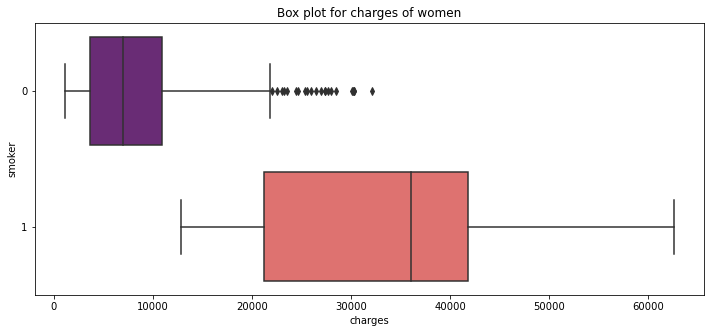

In [152]:
plt.figure(figsize=(12,5))
plt.title('Box plot for charges of women')
sns.boxplot(y='smoker',x='charges',data=data[(data.sex==1)],
           orient='h',palette='magma')

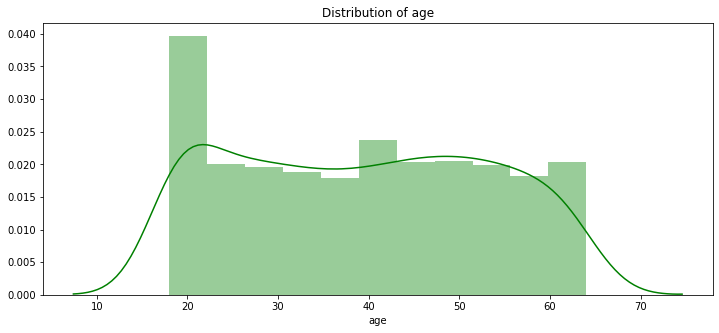

In [153]:
plt.figure(figsize=(12,5))
plt.title('Distribution of age')
ax=sns.distplot(data['age'],color='g')

Text(0.5, 1.0, 'The number of smokers and non-smokers(18 years old)')

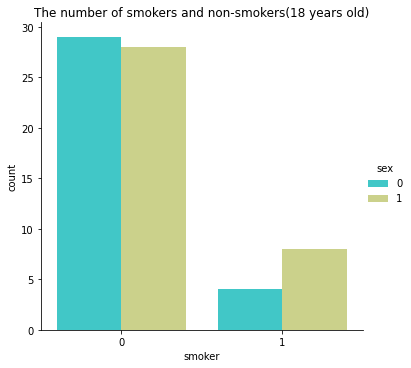

In [154]:
sns.catplot(x='smoker',kind='count',hue='sex',palette='rainbow',data=data[(data.age==18)])
plt.title('The number of smokers and non-smokers(18 years old)')

<AxesSubplot:title={'center':'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

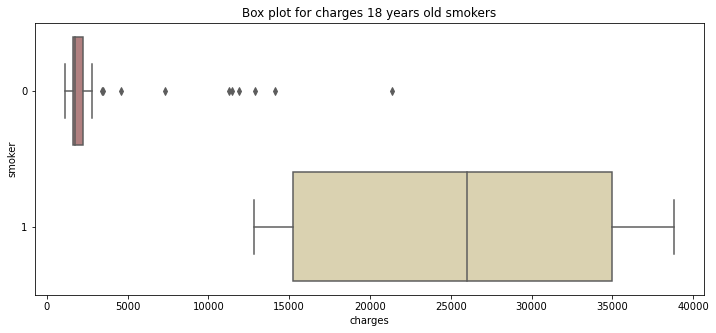

In [155]:
plt.figure(figsize=(12,5))
plt.title('Box plot for charges 18 years old smokers')
sns.boxplot(y='smoker',x='charges',data=data[(data.age==18)],orient='h',palette='pink')

Text(0.5, 1.0, 'Distribution of charges and age for non_smokers')

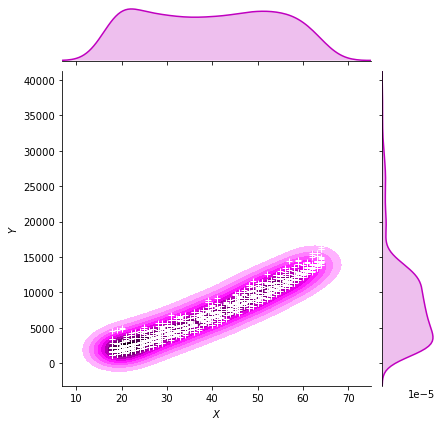

In [156]:
g=sns.jointplot(x='age',y='charges',data=data[(data.smoker==0)],kind='kde',color='m')
g.plot_joint(plt.scatter,c='w',s=30,linewidth=1,marker='+')
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('$X$',"$Y$")
ax.set_title('Distribution of charges and age for non_smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

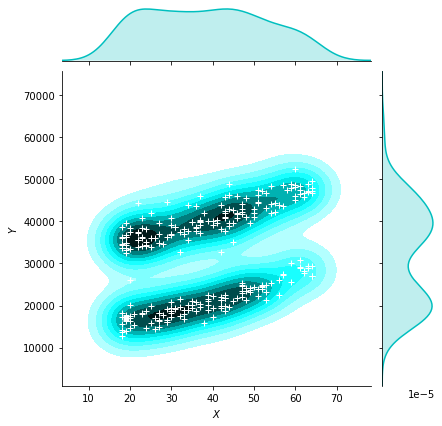

In [157]:
g=sns.jointplot(x='age',y='charges',data=data[(data.smoker==1)],kind='kde',color='c')
g.plot_joint(plt.scatter,c='w',s=30,linewidth=1,marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('$X$','$Y$')
ax.set_title('Distribution of charges and age for smokers')

In [158]:
p=figure(plot_width=500,plot_height=450)
p.circle(x=data[(data.smoker==0)].age,y=data[(data.smoker==0)].charges,size=7,line_color='navy',fill_color='pink',fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

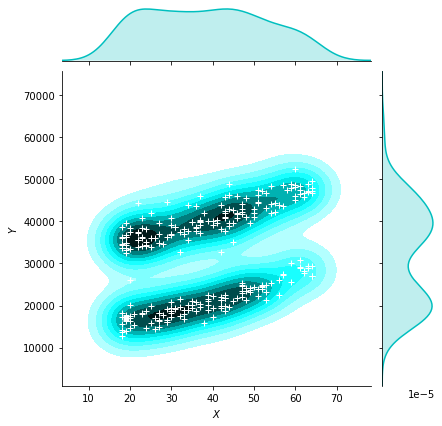

In [159]:
g=sns.jointplot(x='age',y='charges',data=data[(data.smoker==1)],kind='kde',color='c')
g.plot_joint(plt.scatter,c='w',s=30,linewidth=1,marker='+')
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('$X$','$Y$')
ax.set_title('Distribution of charges and age for smokers')

In [160]:
p=figure(plot_width=500,plot_height=450)
p.circle(x=data[(data.smoker==0)].age,y=data[(data.smoker==0)].charges,size=7,line_color='navy',fill_color='pink',fill_alpha=0.9)
show(p)

In [161]:
p=figure(plot_width=500,plot_height=450)
p.circle(x=data[(data.smoker==1)].age,y=data[(data.smoker==1)].charges,size=7,line_color='navy',fill_color='red',fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non_smokers')

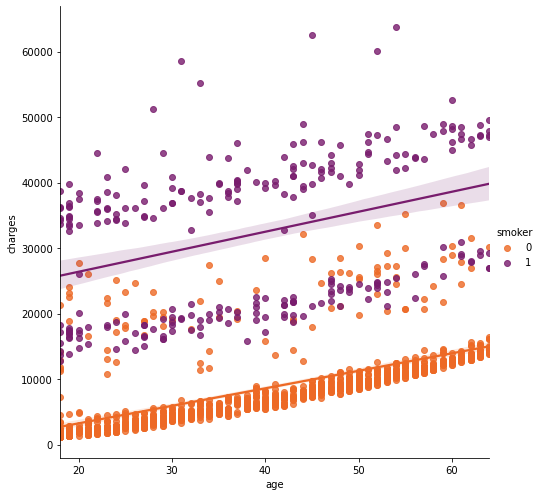

In [162]:
sns.lmplot(x='age',y='charges',hue='smoker',data=data,palette='inferno_r',size=7)
ax.set_title('Smokers and non_smokers')

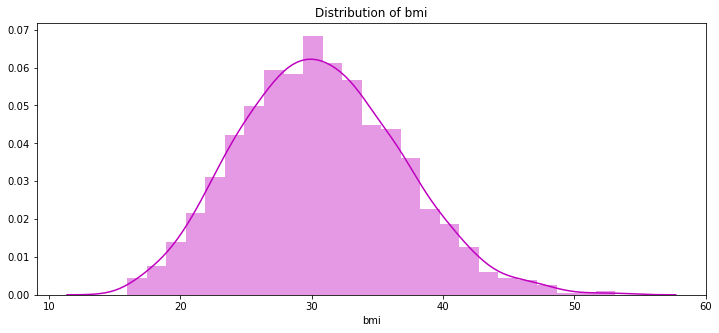

In [163]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax=sns.distplot(data['bmi'],color='m')

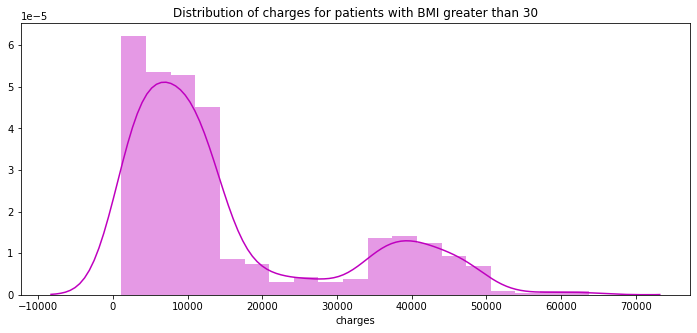

In [164]:
plt.figure(figsize=(12,5))
plt.title('Distribution of charges for patients with BMI greater than 30')
ax=sns.distplot(data[(data.bmi>=30)]['charges'],color='m')

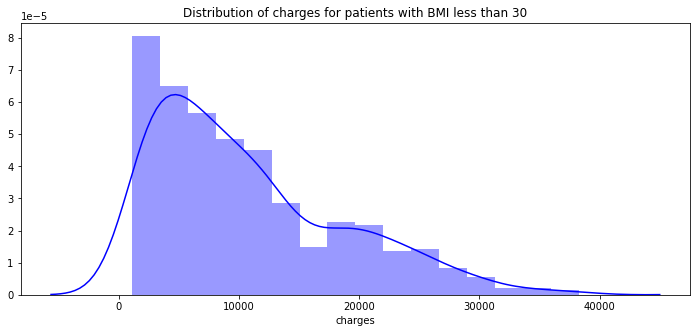

In [165]:
plt.figure(figsize=(12,5))
plt.title('Distribution of charges for patients with BMI less than 30')
ax=sns.distplot(data[(data.bmi<30)]['charges'],color='b')

Text(0.5, 1.0, 'Distribution of bmi and charges')

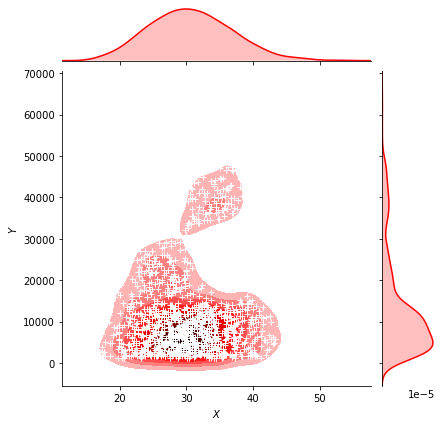

In [166]:
g=sns.jointplot(x='bmi',y='charges',data=data,kind='kde',color='r')
g.plot_joint(plt.scatter,c='w',s=30,linewidth=1,marker='+')
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('$X$','$Y$')
ax.set_title('Distribution of bmi and charges')


<Figure size 1080x432 with 0 Axes>

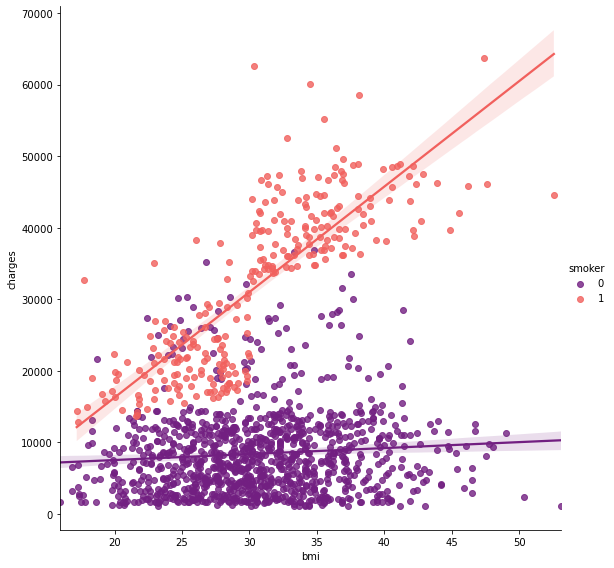

In [167]:
plt.figure(figsize=(15,6))
sns.lmplot(x='bmi',y='charges',hue='smoker',data=data,palette='magma',size=8)

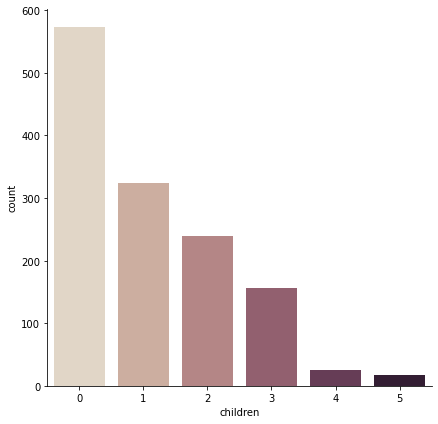

In [168]:
sns.catplot(x='children',kind='count',palette='ch:.25',data=data,size=6)


Text(0.5, 1.0, 'smokers and non_smokers who have childrens')

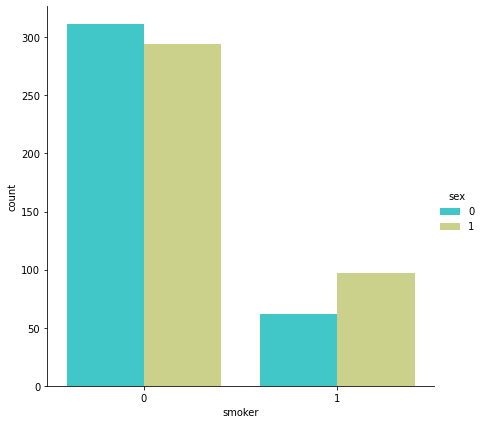

In [169]:
sns.catplot(x='smoker',kind='count',palette='rainbow',hue='sex',data=data[(data.children>0)],size=6)
ax.set_title("smokers and non_smokers who have childrens")

predict the cost of treatment

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [171]:
x=data.drop(['charges'],axis=1)
y=data.charges
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)
lr=LinearRegression().fit(x_train,y_train)

y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7911113876316933


결정계수 약 80%

In [174]:
X=data.drop(['charges','region'],axis=1)
Y=data.charges

quad=PolynomialFeatures(degree=2)
x_quad=quad.fit_transform(X)

X_train,X_test,Y_train,Y_test=train_test_split(x_quad,Y,random_state=0)
plr=LinearRegression().fit(X_train,Y_train)

Y_train_pred=plr.predict(X_train)
Y_test_pred=plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147237


In [179]:
forest=RandomForestRegressor(n_estimators=100,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(x_train,y_train)
forest_train_pred=forest.predict(x_train)
forest_test_pred=forest.predict(x_test)
forest_train_pred=forest.predict(x_train)

print('MSE train data: %.3f, MSE test data: %.3f' %(mean_squared_error(y_train,forest_train_pred),mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' %(r2_score(y_train,forest_train_pred),r2_score(y_test,forest_test_pred)))
      

MSE train data: 3524236.553, MSE test data: 22939116.567
R2 train data: 0.975, R2 test data: 0.856


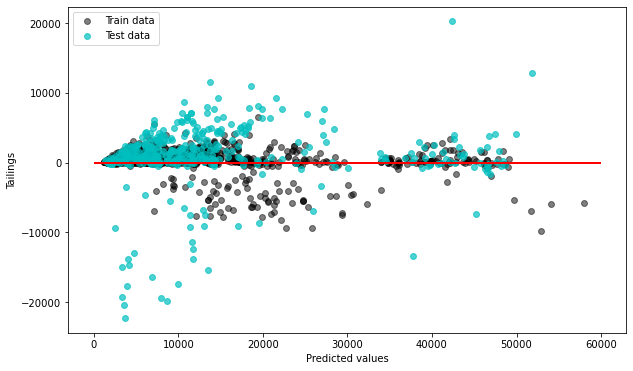

In [180]:
plt.figure(figsize=(10,6))
plt.scatter(forest_train_pred,forest_train_pred-y_train,c='black',marker='o',s=35,alpha=0.5,label='Train data')
plt.scatter(forest_test_pred,forest_test_pred-y_test,c='c',marker='o',s=35,alpha=0.7,label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0,xmax=60000,lw=2,color='red')
plt.show()